In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ejericicio 1

#### Se adiciona el cálculo del rms dev al código

In [2]:
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = np.random.uniform(-1.0, 1.0), np.random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12]
rms = []
for thing in n_trials:
    pi_est = np.zeros(n_runs)
    for i in range(n_runs):
        pi_est[i] = 4.0 * direct_pi(thing) / float(thing)
    rms.append(np.mean(np.sqrt((pi_est - np.pi)**2)))

#### Grafica del rms en funcion de n_trials. Escala log log

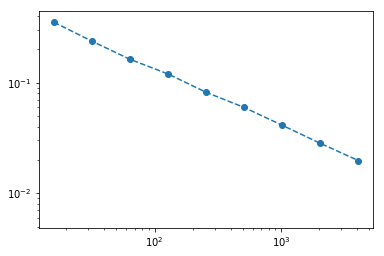

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(n_trials, rms)
ax.plot(n_trials, rms, '--')
ax.set_yscale('log')
ax.set_xscale('log')

# Ejercicio 2

#### Markov cahain. reinicia en el borde

In [4]:
def MCpi_1(N,delta):
    count = 0
    tries = N
    puntos = np.zeros((2,N))
    puntos[:,0] = np.random.uniform(-1.0,1.0,size=2)
    for i in range (1,N):
        prop_x = puntos[0,i-1] + delta*np.random.uniform(-1.0, 1.0)
        prop_y = puntos[1,i-1] + delta*np.random.uniform(-1.0, 1.0)
        if abs(prop_x) <= 1.0 and abs(prop_y) <= 1.0:
            puntos[0,i] = prop_x
            puntos[1,i] = prop_y
            if (puntos[0,i]**2 + puntos[1,i]**2 <= 1.0): count += 1
        else:
            puntos[:,i] = np.random.uniform(-1.0,1.0,size=2)
            tries -= 1
    return 4.0*count/float(tries)

#### Markov cahain. se queda donde está en el borde

In [51]:
def MCpi_2(N,delta):
    count = 0
    puntos = np.zeros((2,N))
    puntos[:,0] = np.random.uniform(-1.0,1.0,size=2)
    for i in range (1,N):
        prop_x = puntos[0,i-1] + delta*np.random.uniform(-1.0, 1.0)
        prop_y = puntos[1,i-1] + delta*np.random.uniform(-1.0, 1.0)
        if abs(prop_x) <= 1.0 and abs(prop_y) <= 1.0:
            puntos[0,i] = prop_x
            puntos[1,i] = prop_y
            if (puntos[0,i]**2 + puntos[1,i]**2 <= 1.0): count += 1
        else:
            puntos[:,i] = puntos[:,i-1]
            if (puntos[0,i]**2 + puntos[1,i]**2 <= 1.0): count += 1
    return 4.0*count/float(N)

#### comparación valores de $\pi$

In [59]:
N = 200
delta = 0.4
pi_1 = MCpi_1(N,delta)
pi_2 = MCpi_2(N,delta)
print(pi_1, pi_2)

3.5243243243243243 3.04


#### rms vs. n_trials para diferentes $\delta$'s. 500 intentos para cada n_trial

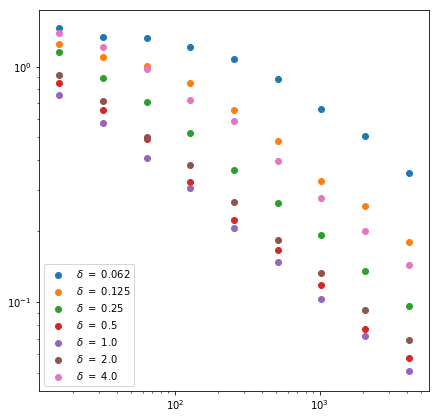

In [58]:
deltas = [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]

fig2 = plt.figure(figsize=(7,7))
ax = fig2.add_subplot(111)

for delta in deltas:
    rms = []
    for number in n_trials:
        pi_est = np.zeros(n_runs)
        for i in range(n_runs):
            pi_est[i] = MCpi_2(number,delta)
        
        rms.append(np.sqrt(np.mean((pi_est - np.pi)**2)))
    ax.scatter(n_trials, rms, label='$\delta\ =\ {}$'.format(delta))
    ax.set_yscale('log')
    ax.set_xscale('log')
ax.legend()
plt.show()


# Ejercicio 3

#### Aquí no estoy seguro que la bolita se mueva con las probabilidades que ponen en las reglas, pero al parecer si tiende a una dist. uniforme

In [178]:
def bolita(T):
    grid = np.zeros((3,3))
    fil, col = np.random.randint(0,3), np.random.randint(0,3)
    grid[fil,col] += 1
    t=0
    while t < T:
        n_fil = fil + np.random.randint(-1,2)
        n_col = col + np.random.randint(-1,2)
        if (0 <= n_fil <= 2):
            if (0 <= n_col <= 2):
                fil = n_fil
                col = n_col
        grid[fil,col] += 1
        t+= 1
    return grid
    

#### Histogramas de freq absoluta de la pos de la bolita. cada casilla del tablero corresponde a un número del 1 al 9. Y de una vez calculamos la divergencia Kullback–Leibler

/home/juanito/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/juanito/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


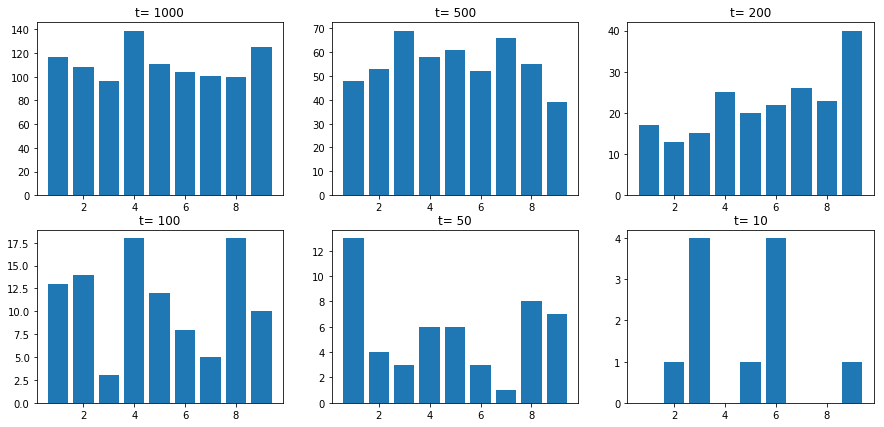

In [197]:
tes = [1000, 500, 200, 100, 50, 10]
DKL = []
pos = np.arange(1,10)
fig = plt.figure(figsize=(15,7))
i = 1
for t in tes:
    rrr = bolita(t)
    aaa = rrr.flatten()
    dist = aaa/t
    DKL.append(np.sum(dist*np.log(dist/(1./9.))))
    ax = fig.add_subplot(2,3,i)
    ax.bar(pos,aaa)
    ax.set_title("t= {}".format(t))
    i += 1


#### grafica de la divergencia Kullback–Leibler vs. n_pasos

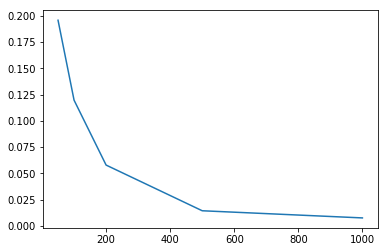

In [198]:
plt.plot(tes, DKL)